In [ ]:
# Importing libraries
import sys
sys.path.append(r'C:\Users\hp04\AppData\Local\Programs\Python\Python311\Lib\site-packages')
import numpy as np   # Data analysis and data cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Data visualization
sns.set_theme()
from mlxtend.plotting import plot_decision_regions
import missingno as msno  # To Visualize messing values
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV #To find the optimal hyperparameter for our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report # To compare classification models
from sklearn.metrics import confusion_matrix  #To find the performance of our model
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


# **Problem statement**
By using there patients records, we will try to build a machine learning project to accurately predict whether or not a patient has diabetes.
# Information about dataset attributes

- Pregnancies: To express the Number of pregnancies
- Glucose: Plasma glucose concentration in blood
- BloodPressure: diastolic Blood pressure measurement (mm Hg)
- SkinThickness: triceps skin fold thikness (mm)
- Insulin: 2h serum insulin (mu U/ml)
- BMI:  Body mass index BMI= weight (kg)​/height (m)2
- DiabetesPedigreeFunction: To express the Diabetes percentage.
It is the probability of diabetes based on the person's family history  
DPF=∑(Weight of Relative Type × Age of Onset)
- Age: To express the age
- Outcome: To express the final result: 1 is Yes and 0 is No


# Business objectives and constraints
- The cost of miss-classification can be very high.
- We have to be mindful and careful regarding the precision of the model since it is from the health domain.
- Even though the dataset is relatively small, this model will give a pretty accurate result.

In [ ]:
data=pd.read_csv('diabetes.csv')
data.head(8)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0

#**Exploratory analysis of the dataset:**

In [ ]:
# Information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# More about the dataset (some statistical measurements):
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Checking if there are any missing values and displaying their number:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Data visualisation:**

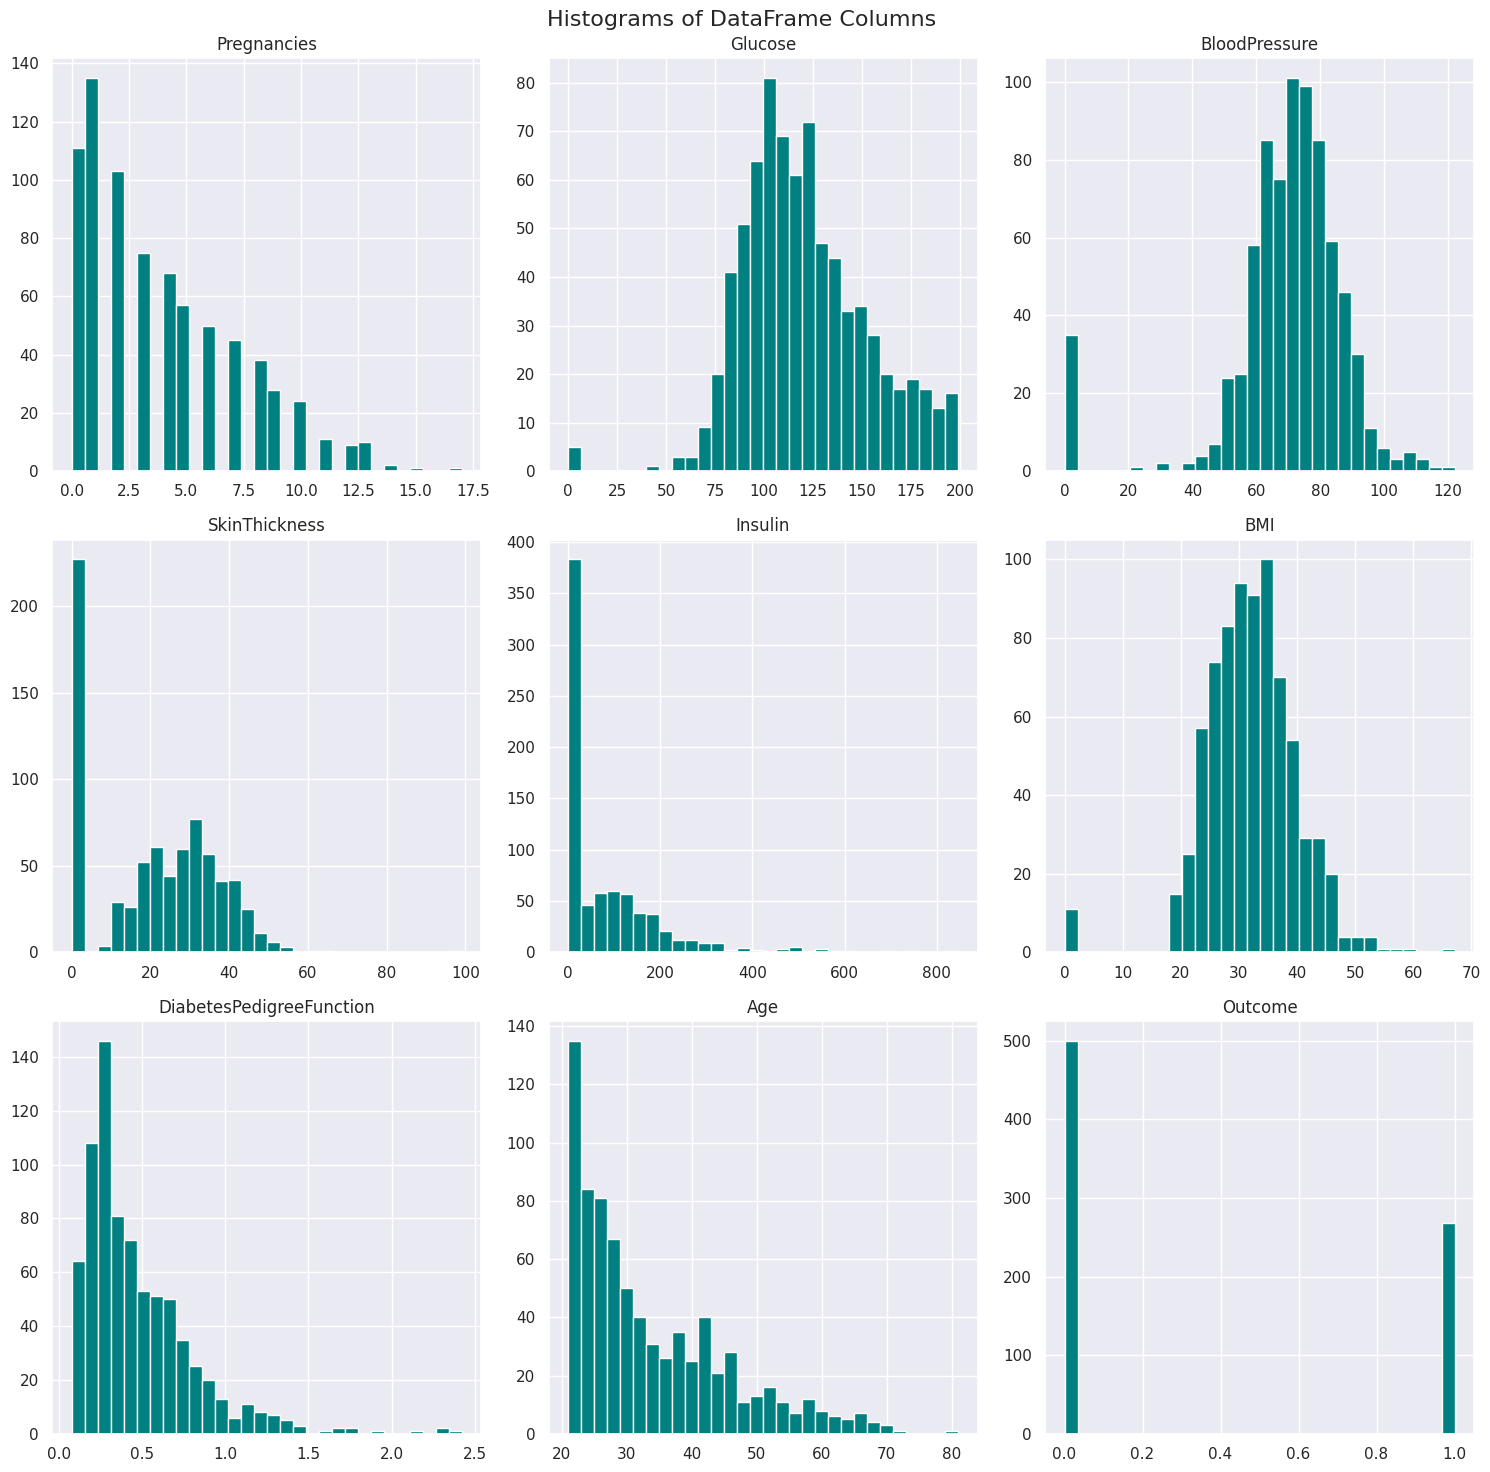

In [ ]:

# Create the histogram
fig = data.hist(figsize=(15, 15), bins=30, color='teal')

# Customize background
plt.gcf().set_facecolor('white')  # Set background color for the entire figure

# Add titles and labels (optional)
plt.suptitle('Histograms of DataFrame Columns', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Creating a deep copy of the original dataframe
data_copy = data.copy(deep=True)

# Replacing 0 values with NaN in the specified columns
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
    data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [ ]:
# Interpolation for continuous columns
data_copy['Glucose'] = data_copy['Glucose'].interpolate(method='linear')
data_copy['BloodPressure'] = data_copy['BloodPressure'].interpolate(method='linear')
data_copy['SkinThickness'] = data_copy['SkinThickness'].interpolate(method='linear')
data_copy['Insulin'] = data_copy['Insulin'].interpolate(method='linear')
data_copy['BMI'] = data_copy['BMI'].interpolate(method='linear')


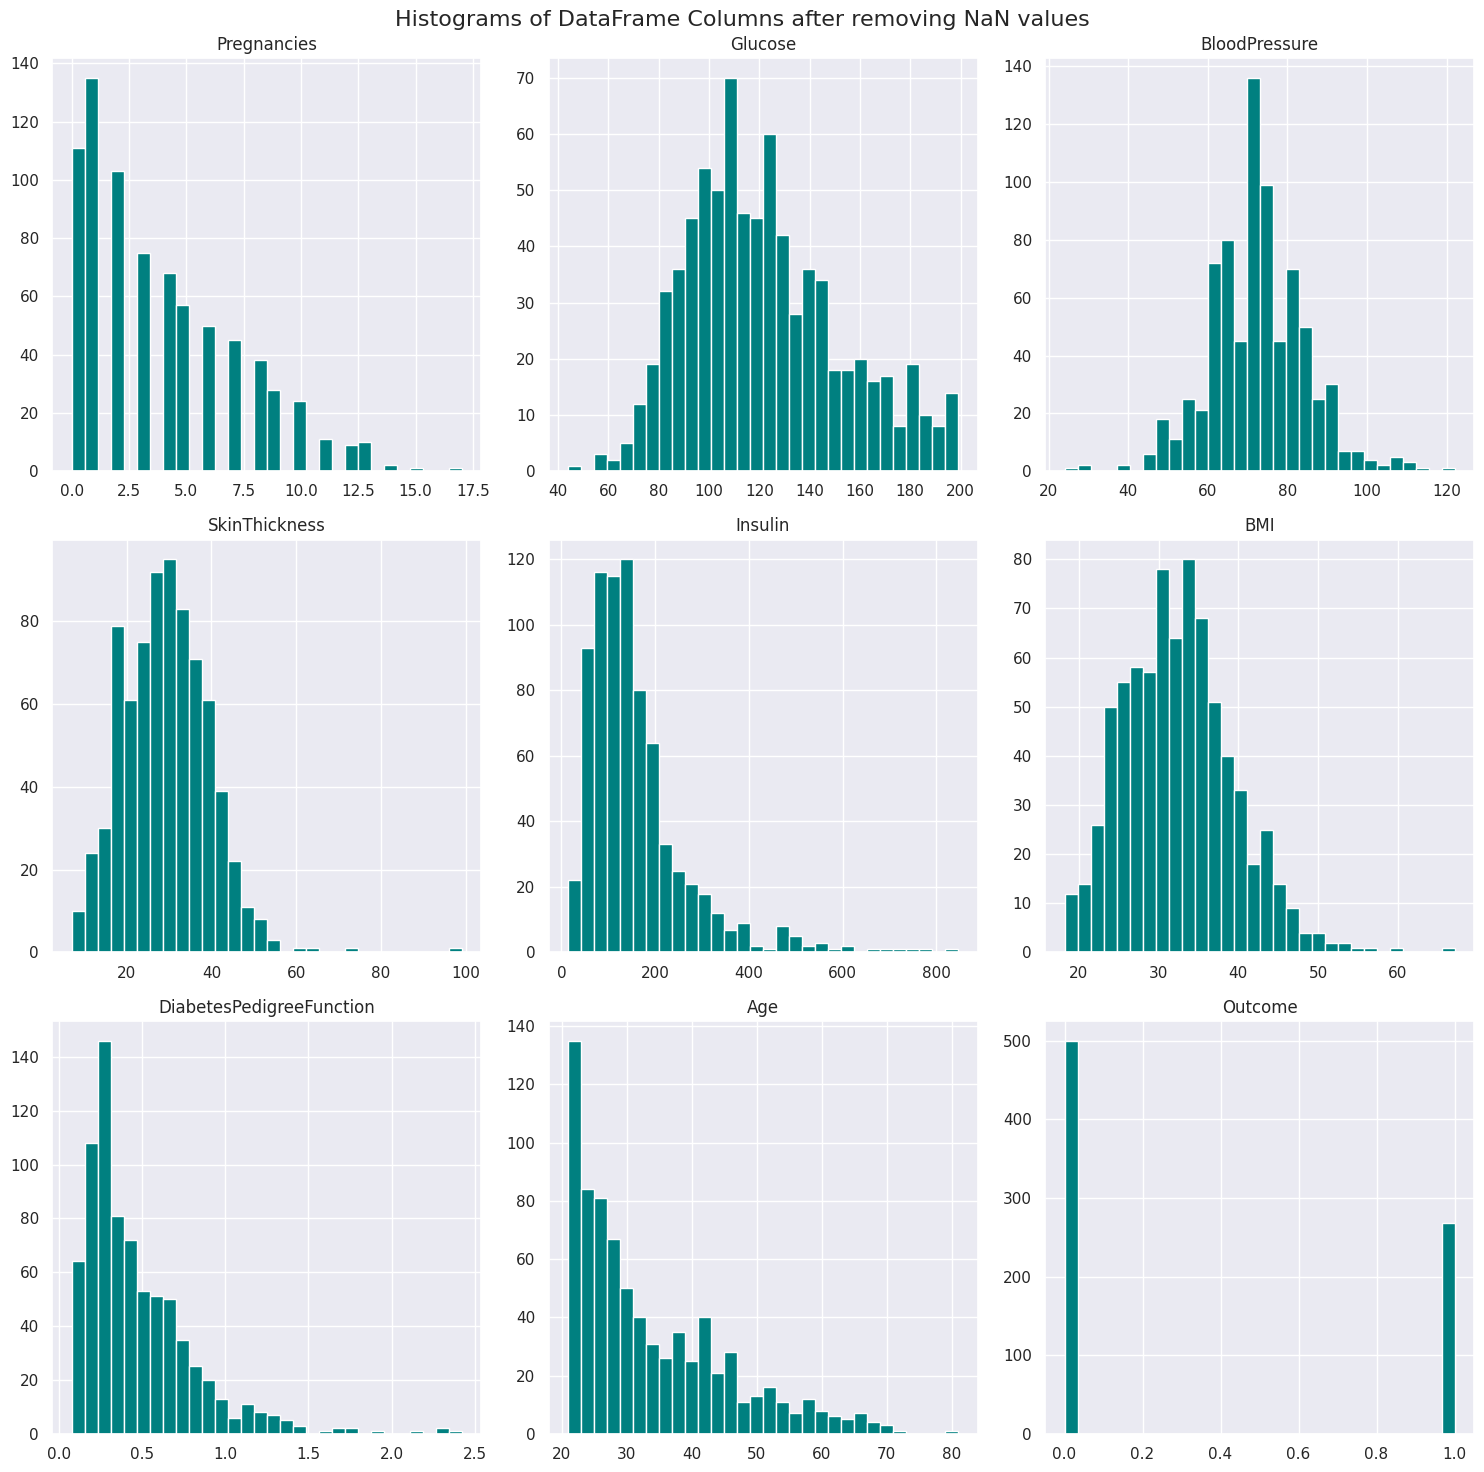

In [ ]:
# Create the histogram
fig = data_copy.hist(figsize=(15, 15), bins=30, color='teal')

# Customize background
plt.gcf().set_facecolor('white')  # Set background color for the entire figure

# Add titles and labels (optional)
plt.suptitle('Histograms of DataFrame Columns after removing NaN values', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 2000x2000 with 0 Axes>

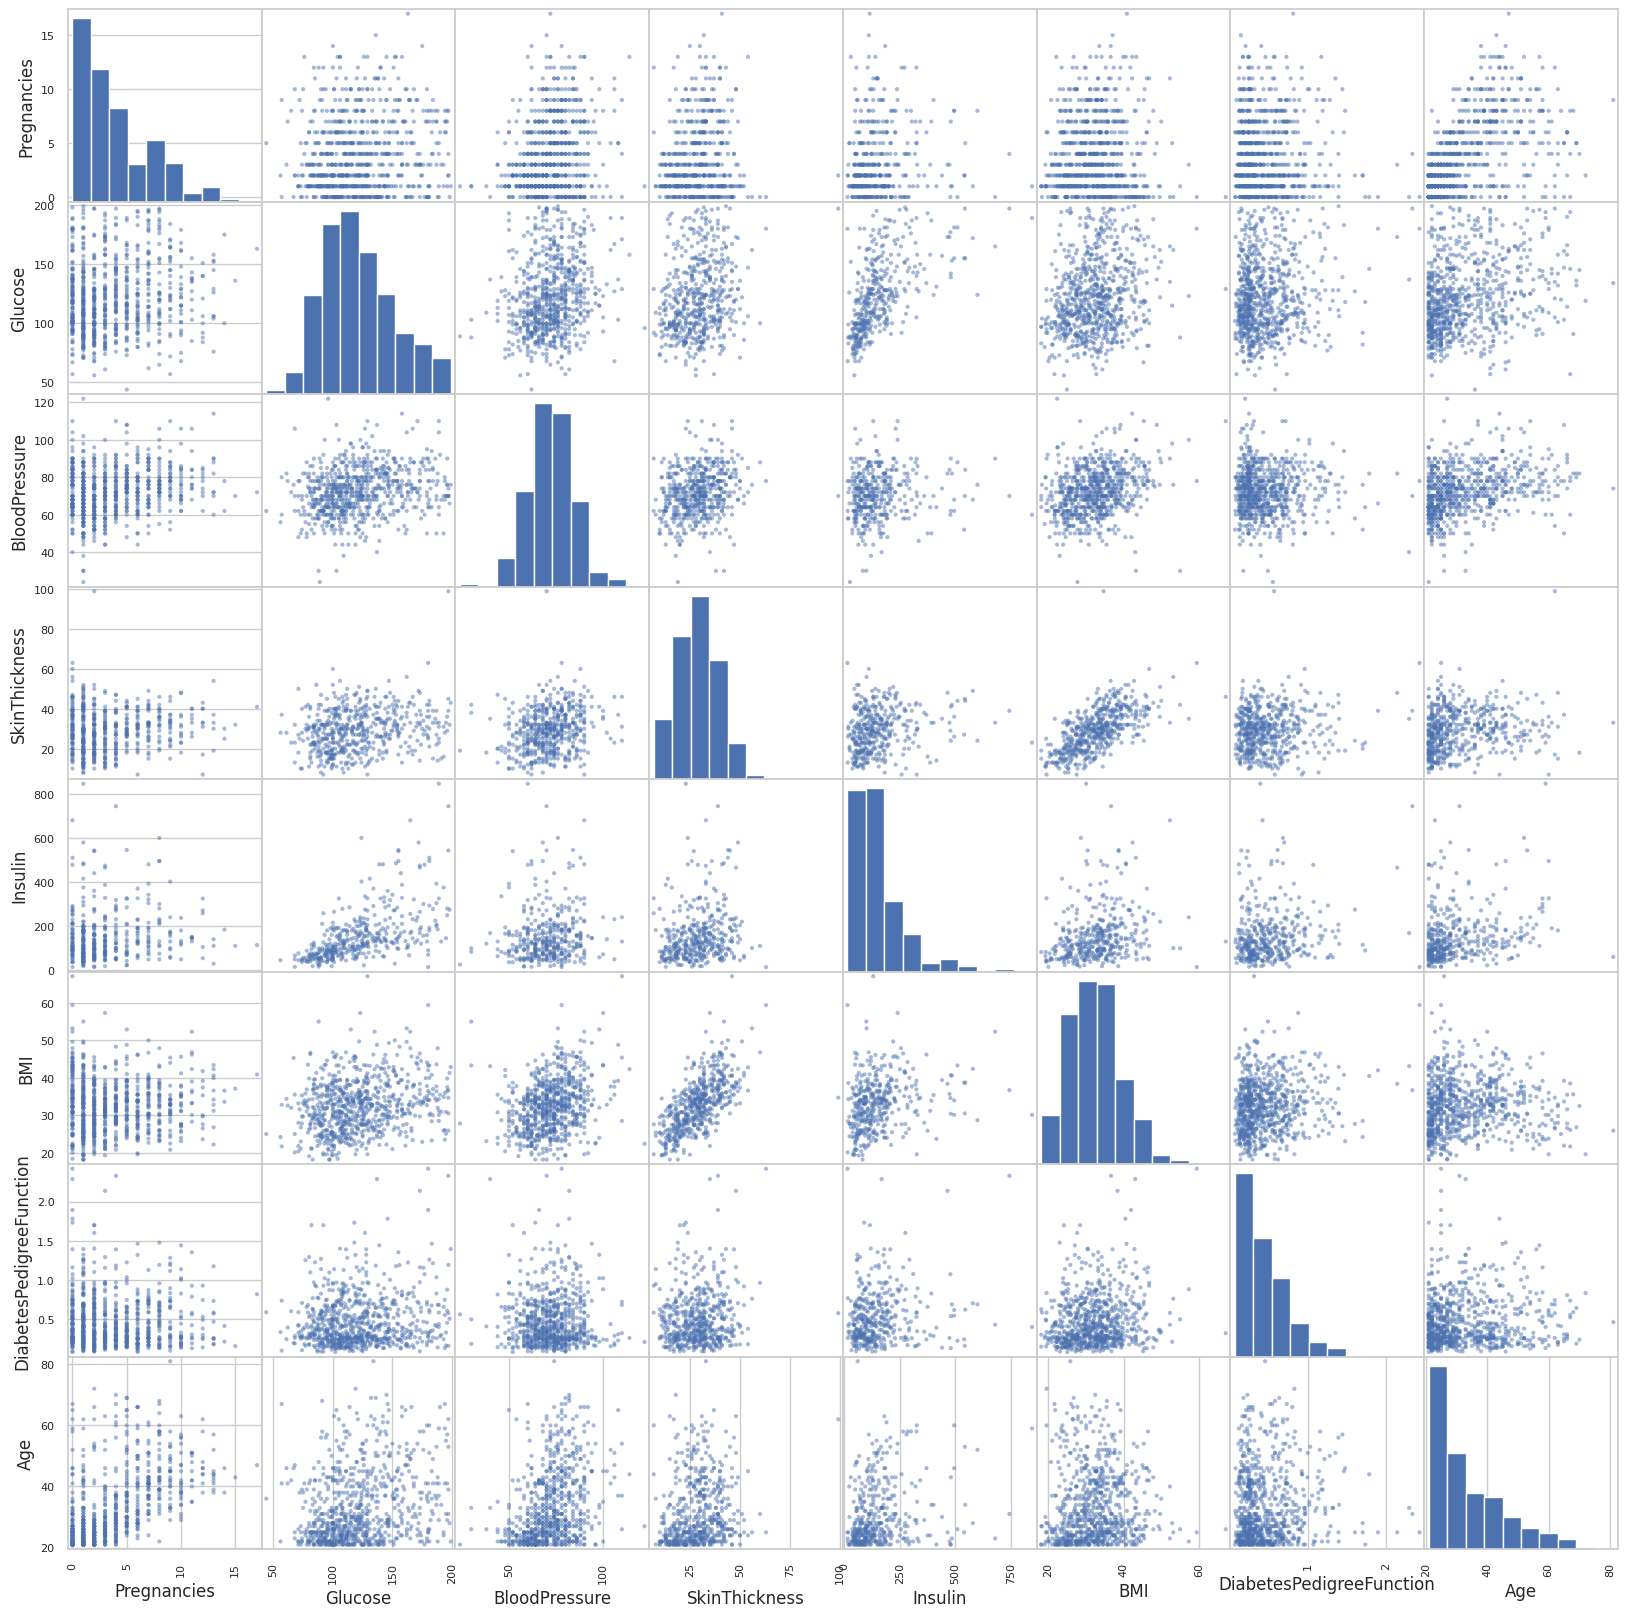

In [ ]:

# Create the scatter matrix by specifying the figure size
plt.figure(figsize=(20, 20))  # Size of the figure

# Plot the scatter matrix, excluding the 'Outcome' column and setting the diagonal to histograms
scatter_matrix(data.drop('Outcome', axis=1), figsize=(20, 20))

# Show the plot
plt.show()

 The scatter matrix helps to visually detect if there are any correlations between variables


<Figure size 640x480 with 0 Axes>

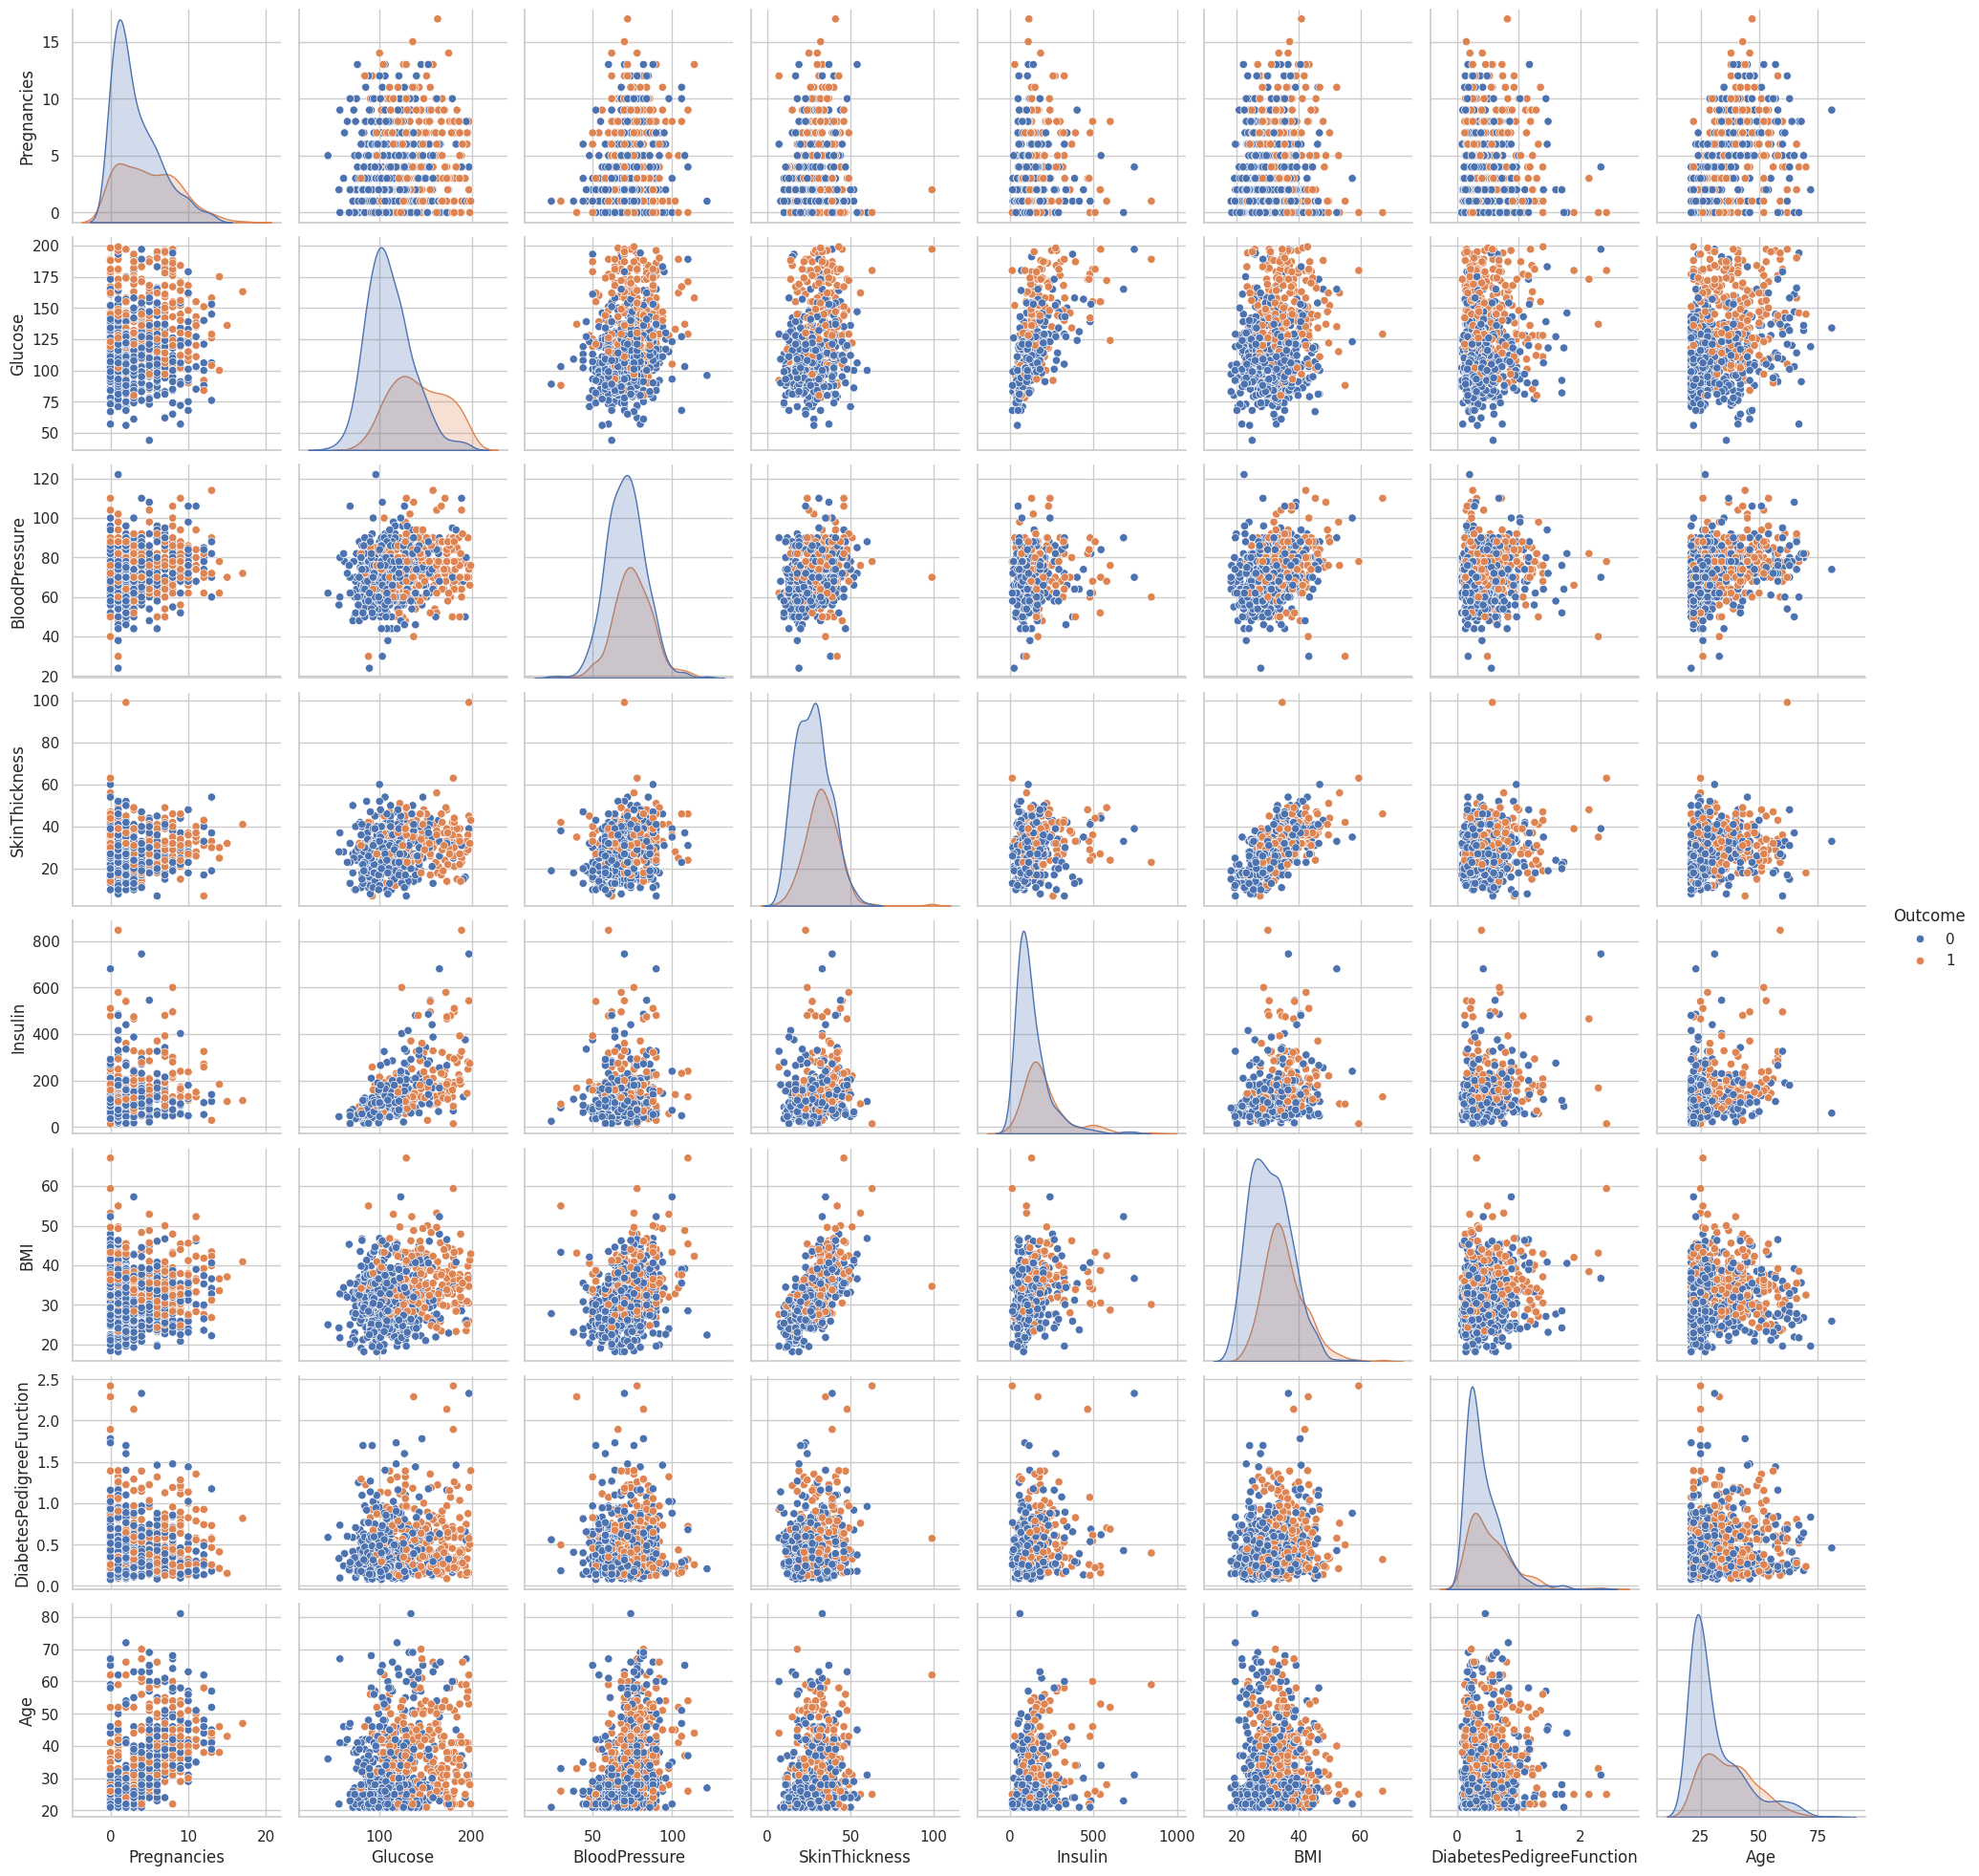

In [ ]:
# Plotting the pair plots for the data

p=sns.pairplot(data_copy,hue='Outcome')

# **Heat map and correlations between various features in the datset:**

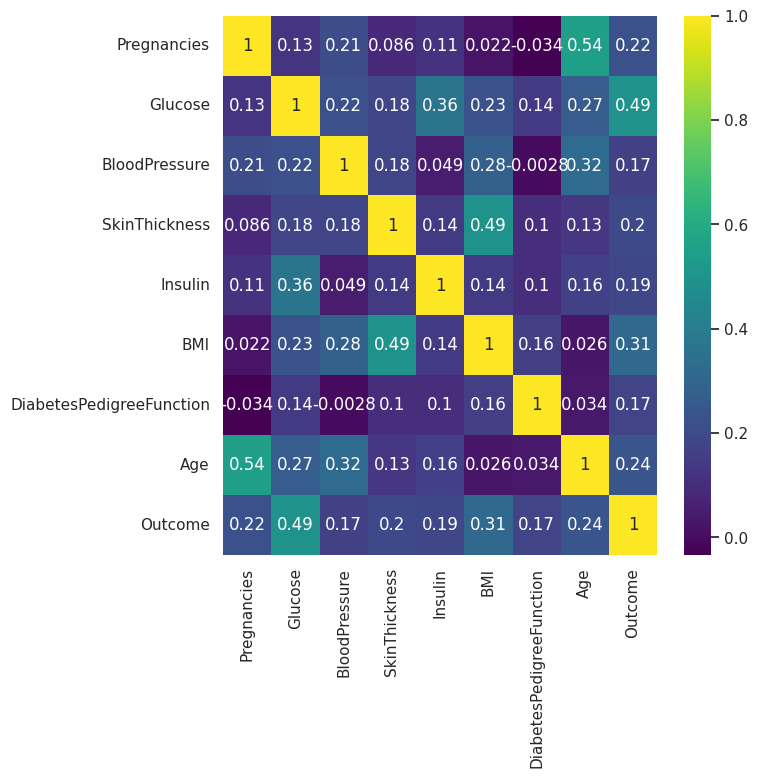

In [ ]:
plt.figure(figsize=(7,7))
plot=sns.heatmap(data_copy.corr(),annot=True,cmap='viridis')

In [ ]:
sc_X=StandardScaler()
#normalize the features of a dataset, which means transforming the data so that it has a mean of 0 and a standard deviation of 1.
X=pd.DataFrame(sc_X.fit_transform(data_copy.drop(['Outcome'],axis=1)))  #Dropping the last column in the dataset
#x contains all the independant variables of the dataset
# Now X is the scaled dataset

X.head()

0         1         2         3         4         5         6  \
0  0.639947  0.865108 -0.033518  0.599120       NaN  0.164789  0.468492   
1 -0.844885 -1.206162 -0.529859 -0.008104       NaN -0.851856 -0.365061   
2  1.233880  2.015813 -0.695306 -0.311716       NaN -1.331132  0.604397   
3 -0.844885 -1.074652 -0.529859 -0.615328 -0.583235 -0.634004 -0.920763   
4 -1.141852  0.503458 -2.680669  0.599120  0.080295  1.544521  5.484909   

          7  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496

In [ ]:
y=data_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the dataset into training and testing data:

In [ ]:
#Training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
'''
Here, 20% of the data will be used to test the model
Fixing the random seed to 50 for example ensures that the data is split the same way every time I run the code, to get consistant results
'''

'\nHere, 20% of the data will be used to test the model\nFixing the random seed to 50 for example ensures that the data is split the same way every time I run the code, to get consistant results\n'

#**Model building**
K-nearest-neighbor (KNN):

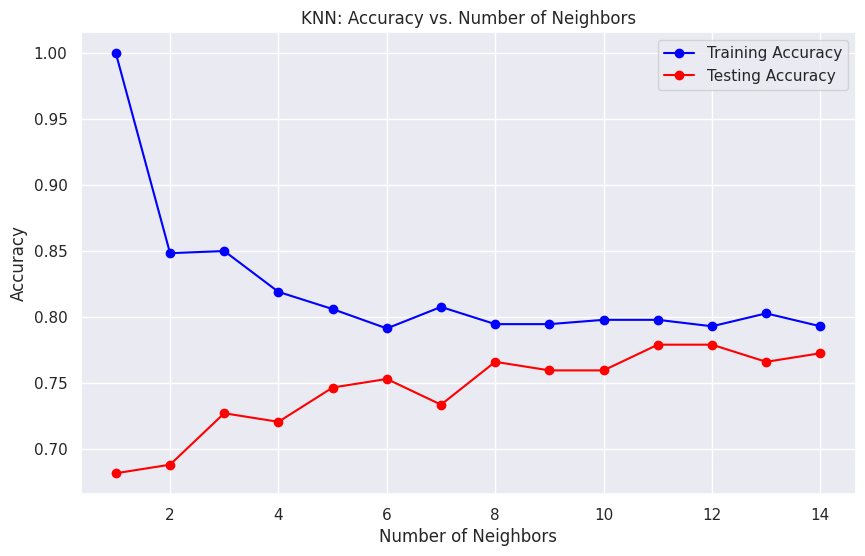

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')
''''
'median': Replaces missing values with the median.
'most_frequent': Replaces missing values with the most common value in the column.
'''
# Impute missing values in training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Lists to store accuracy scores
test_scores = []
train_scores = []

# Loop through different values of n_neighbors (1 to 14)
for i in range(1, 15):
    # Initialize KNeighborsClassifier with current value of n_neighbors
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the model to the training data
    knn.fit(X_train, Y_train)

    # Calculate the accuracy for both train and test sets
    train_scores.append(knn.score(X_train, Y_train))  # Training accuracy
    test_scores.append(knn.score(X_test, Y_test))    # Testing accuracy

# Plotting the results to visualize the relationship between neighbors and accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), train_scores, label="Training Accuracy", color='blue', marker='o')
plt.plot(range(1, 15), test_scores, label="Testing Accuracy", color='red', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
max_train_scores=max(train_scores)
'''each index+1 in train_scores represents the corresponding number of neighbors'''

#Getting the corresponding index for the maximum accuracy score during the training phase
max_train_scores_ind=[i for i,v in enumerate(train_scores) if v==max_train_scores]
# Find the maximum test score from the test_scores list
max_test_scores = max(test_scores)

# Each index in test_scores corresponds to a value of k (number of neighbors) used in the KNN algorithm
# The index+1 represents the corresponding k value since k starts from 1
# Using enumerate() to loop through the test_scores list with both index (i) and value (v)
# enumerate() allows us to iterate over test_scores while keeping track of each element's index

print('Max training score: {}% for k={}'.format(max_train_scores*100,list(map(lambda x:x+1,max_train_scores_ind))))

Max text score: 100.0% for k=[1]


In [ ]:
# Find the maximum test score from the test_scores list
max_test_scores = max(test_scores)

# Get the indices where the maximum test score occurs (in case of ties)
max_test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_scores]

# Print the maximum test score and the corresponding k values (add 1 to indices to get the actual k values)
print('Max test score: {}% for k={}'.format(round(max_test_scores * 100,3), list(map(lambda x: x + 1, max_test_scores_ind))))


Max test score: 77.922% for k=[11, 12]


#**Plotting the results to visualize the relationship between neighbors and accuracy:**


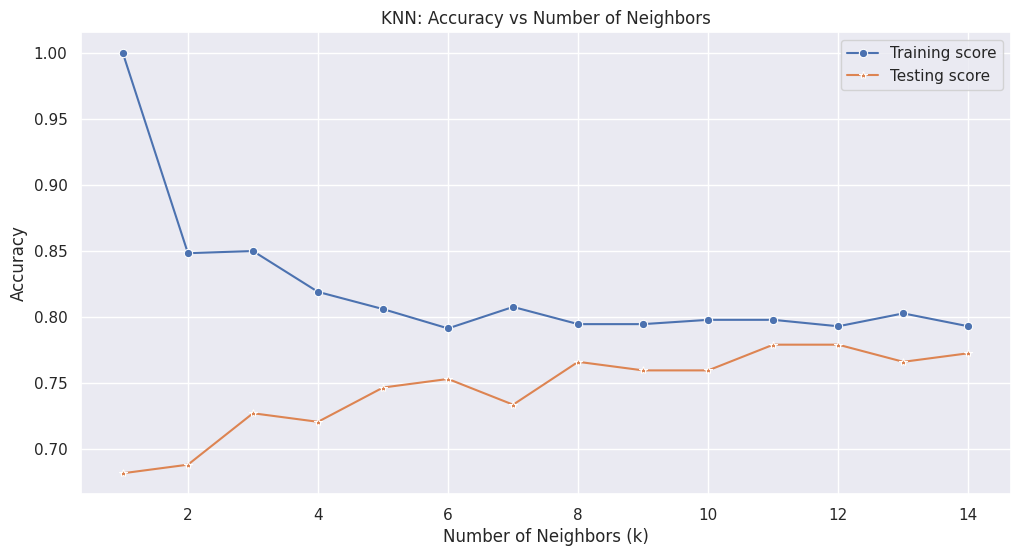

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the training accuracy scores
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='o', label='Training score')

# Plot the testing accuracy scores
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='*', label='Testing score')

# Display the plot
plt.xlabel('Number of Neighbors (k)')  # Label for the x-axis
plt.ylabel('Accuracy')                # Label for the y-axis
plt.title('KNN: Accuracy vs Number of Neighbors')  # Title of the plot
plt.legend()                          # Display the legend
plt.grid(True)                        # Add grid lines for better readability
plt.show()


As the graph shows, the best result is obtained for k=12. We'll use this value in our final classification model.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,Y_train)
# The accuracy of the model:
print("The model's accuracy: {}%.".format(round(knn.score(X_test, Y_test) * 100, 4)))

The model's accuracy: 77.9221%.


# **The decision boundary :**
A decision boundary is a boundary or a surface that separates different classes in a classification problem. It represents the regions in the feature space where the classification model changes its predicted class. In other words, it's the line (in 2D) or surface (in higher dimensions) that divides the space based on the model's decision rules.




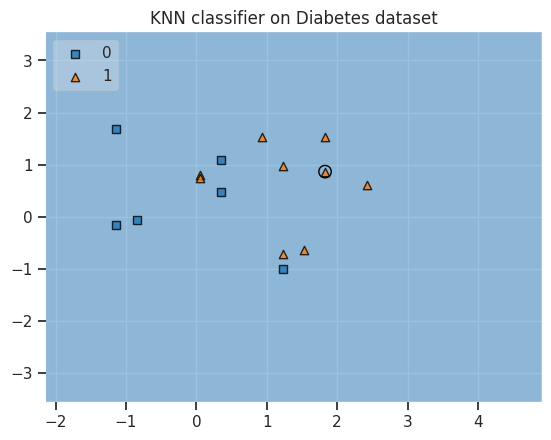

In [ ]:
# Set fixed values for higher-dimensional features (features 2, 3, 4, 5, 6, 7)

fixed_value = 20000
'''
Features 2, 3, 4, 5, 6, and 7: These refer to specific columns in the feature matrix X (indexed by numbers starting from 0). For example:
    Feature 2 corresponds to the third column of X
    Feature 3 corresponds to the fourth column of X
    And so on up to feature 7 (the eighth column).
'''

'''
plotting the decision regions based on a subset of features (typically the first two features),
and the remaining features (2, 3, 4, 5, 6, 7) need to be "fixed" or set to a constant value because the plot_decision_regions function can only plot decision regions for two features at a time.
The filler_feature_values and filler_feature_ranges arguments are used to set these constant values for the features we're not visualizing.
'''

# Set the figure background color to white
plt.figure(facecolor='white')

'''# Create the plot
fig, ax = plt.subplots()

# Set the background color of the plot area (axes) to white
ax.set_facecolor('white')'''

# Convert X, y, and X_test to NumPy arrays if they are pandas objects
X_array = X.values if isinstance(X, pd.DataFrame) else X
y_array = y.values if isinstance(y, pd.Series) else y
X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Plot the decision regions for the KNN classifier on the Diabetes dataset
plot_decision_regions(X_array, y_array, clf=knn, legend=2,
                      filler_feature_values={2: fixed_value, 3: fixed_value, 4: fixed_value, 5: fixed_value, 6: fixed_value, 7: fixed_value},
                      filler_feature_ranges={2: fixed_value, 3: fixed_value, 4: fixed_value, 5: fixed_value, 6: fixed_value, 7: fixed_value},
                      X_highlight=X_test_array)  # Ensure X_test is a NumPy array

# Set the plot title and show it
plt.title("KNN classifier on Diabetes dataset")
plt.show()

**NB:**
The clf in the code refers to the classifier we're using to make predictions: the K-Nearest Neighbors (KNN) algorithm.

# **Confusion matrix :**
A confusion matrix is a performance evaluation tool commonly used in classification problems. It helps assess the performance of a classification algorithm by comparing the predicted classifications with the actual ground truth values. It provides a detailed breakdown of the results, making it easier to understand how well the model is performing and where it might be making mistakes.


    True Positive (TP): The model correctly predicted the positive class.
    False Positive (FP): The model incorrectly predicted the positive class (type I error).
    True Negative (TN): The model correctly predicted the negative class.
    False Negative (FN): The model incorrectly predicted the negative class (type II error).

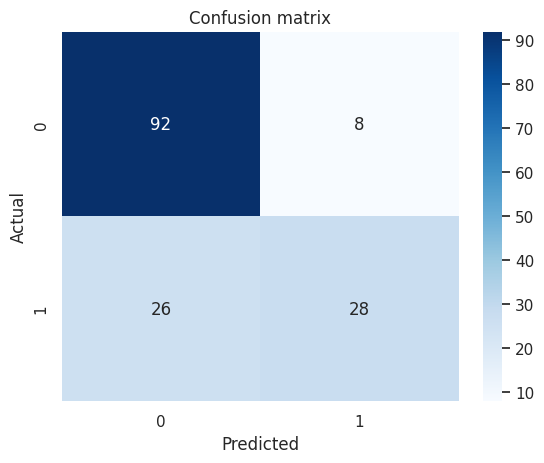

In [ ]:
y_pred=knn.predict(X_test)
# computing the confusion matrix by comparing the actual labels (Y_test) with the predicted labels (y_pred).
cnf_matrix=metrics.confusion_matrix(Y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='g')
#pd.DataFrame(cnf_matrix, ...):
'''Here, we convert the cnf_matrix into a Pandas DataFrame for easier labeling and visualization.
This makes it easier to label the rows (actual classes) and columns (predicted classes).'''
#annot=True:
'''This annotation option will display the values in each cell of the heatmap.'''
#fmt='g':
'''The fmt='g' ensures that the numbers are formatted as general integers, which is typically what you'd want in a confusion matrix.'''

plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**TP**=92, **FN**=26
**FP**=8, **TN**=28

# **Classification report :**

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       100
           1       0.78      0.52      0.62        54

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



# **ROC and AUC plot and explanation :**
The ROC (**Receiver Operating Characteristic**) curve and the AUC (**Area Under the Curve**) are used to evaluate the performance of a classification model.

1.  The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds
2.  The AUC measures the area under this curve, indicating the model's ability to distinguish between classes.

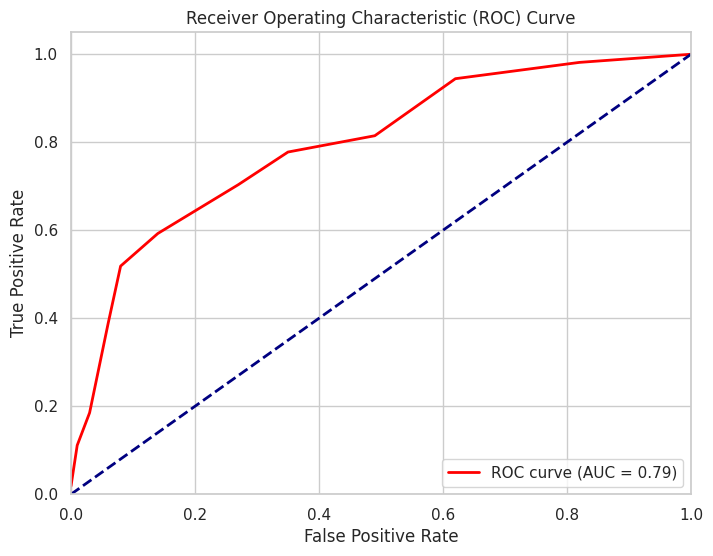

AUC: 0.79


In [ ]:
from sklearn.metrics import auc

y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot ROC Curve using Seaborn and Matplotlib
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the diagonal line (representing random classifier) using Seaborn
sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Print the AUC value
print(f"AUC: {roc_auc:.2f}")

The higher the value of AUC is, the best performing the model is ; how accurately the model predicts whether the patient has diabetes or not.

In [ ]:
# Function to get user input and make prediction
def get_user_input_and_predict():

    # Disclaimer and accuracy text in red with an emoji
    print("\033[91m ⚠️ Disclaimer❗\033[0m")
    print("\n This model is just a prediction tool and cannot replace a proper checkup .")
    print("Model accuracy: 77.9221% (based on the training dataset). Please consult a healthcare professional for a proper diagnosis.\n")


    try:
        # Collecting user input for each feature (with units specified)
        pregnancies = int(input("Enter number of pregnancies (unit: count): "))
        glucose = float(input("Enter glucose level (unit: mg/dL): "))
        blood_pressure = float(input("Enter blood pressure (unit: mmHg): "))
        skin_thickness = float(input("Enter skin thickness (unit: mm): "))
        insulin = float(input("Enter insulin level (unit: µU/mL): "))
        bmi = float(input("Enter BMI (Body Mass Index) (unit: kg/m²): "))
        diabetes_pedigree_function = float(input("Enter diabetes pedigree function (unit: scale from 0 to 1): "))
        age = int(input("Enter age (unit: years): "))

        # Creating a DataFrame for the user input, ensuring the same columns as the training data
        user_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin,
                                   bmi, diabetes_pedigree_function, age]],
                                  columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                                           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

        # Make the prediction using the trained model
        prediction = knn.predict(user_data)

        # Show the result to the user
        if prediction[0] == 1:
            print("\nThe prediction is: Positive for diabetes (1).")
        else:
            print("\nThe prediction is: Negative for diabetes (0).")

    except ValueError:
        print("Invalid input. Please enter numeric values for all fields.")

get_user_input_and_predict()

 ⚠️ Disclaimer❗

 This model is just a prediction tool and cannot replace a proper checkup .
Model accuracy: 77.9221% (based on the training dataset). Please consult a healthcare professional for a proper diagnosis.

Enter number of pregnancies (unit: count): 2
Enter glucose level (unit: mg/dL): 3
Enter blood pressure (unit: mmHg): 5
Enter skin thickness (unit: mm): 6
Enter insulin level (unit: µU/mL): 7
Enter BMI (Body Mass Index) (unit: kg/m²): 3
Enter diabetes pedigree function (unit: scale from 0 to 1): 0.5
Enter age (unit: years): 6

The prediction is: Positive for diabetes (1).


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# **GridSearchCV implementation**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Impute missing values with the mean of the columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create a parameter grid for the number of neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

# Initialize KNeighborsClassifier
knn =KNeighborsClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model to the data (X, y)
knn_cv.fit(X_imputed, y)

# Print the best parameter (number of neighbors)
print("Best number of neighbors:", knn_cv.best_params_)

# Print the best score (accuracy)
print("Best score:", knn_cv.best_score_)

Best number of neighbors: {'n_neighbors': 30}
Best score: 0.7774127832951361
Best score: 0.7774127832951361
